# Gold Price Prediction using Random Forest Classifier
___________________________________________________

### Importing necessary libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data Collection & Processing

#### Loading dataset

In [6]:

gold = pd.read_csv('gld_price_data.csv')

In [7]:
gold

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [8]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
# checking if there is any missing value
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### Finding Correlation Patterns

In [11]:
# Corellation (Positive and Negative)
numeric_columns = gold.select_dtypes(include=np.number)
correlation = numeric_columns.corr()


<Axes: >

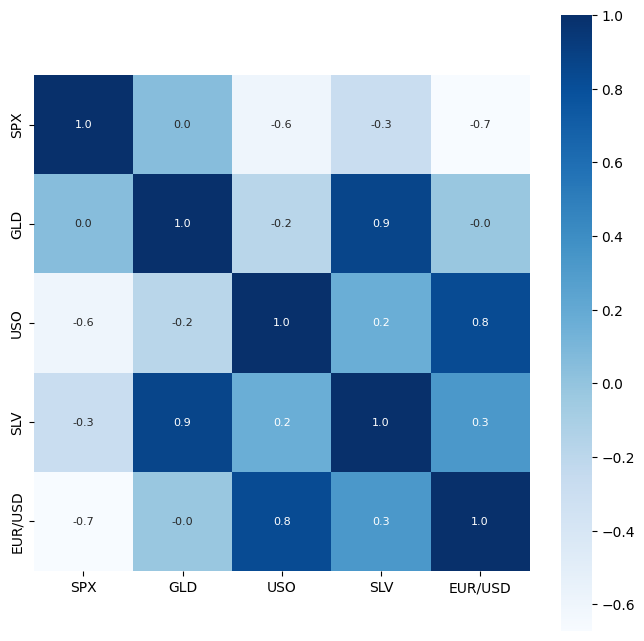

In [12]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt='.1f', annot=True,annot_kws = {'size':8},cmap= 'Blues')


In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


### Checking distribution of the GLD Price

C:\Users\aasth\AppData\Local\Temp\ipykernel_14604\3946921972.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold['GLD'],color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

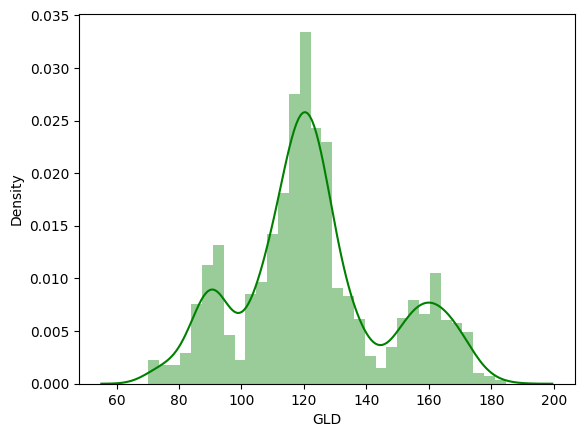

In [14]:

sns.distplot(gold['GLD'],color = 'green')

### Splitting the Features ana Target 

In [15]:

X = gold.drop(['Date','GLD'],axis = 1)
Y = gold['GLD']

In [16]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [17]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

### Train Test Split

In [18]:
# Splitting Training data & Test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

### Model Training

In [19]:

regressor = RandomForestRegressor(n_estimators = 100)

In [20]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

### Model Evaluation

#### Prediction on Test Data

In [21]:

test_data_prediction = regressor.predict(X_test)

In [22]:
test_data_prediction

array([168.54679946,  82.10099987, 115.68920014, 127.65380052,
       120.69540131, 154.7783972 , 150.29289833, 125.9542007 ,
       117.41979864, 125.92880069, 116.439901  , 171.9525006 ,
       141.23709863, 167.74909863, 115.17900026, 117.9501006 ,
       139.99460357, 170.10930103, 159.31060208, 156.04939971,
       155.20570031, 125.31620035, 175.61539968, 157.01450335,
       125.17930073,  93.91449927,  77.99319968, 120.4818    ,
       119.06919921, 167.44870037,  87.9886002 , 125.13729994,
        91.04940104, 117.51230059, 121.22969924, 136.15220095,
       115.66480107, 114.81080042, 146.85129985, 107.35720082,
       104.35040224,  87.07389794, 126.58370066, 117.90920032,
       152.30099887, 119.54810022, 108.36100062, 107.95169835,
        93.23850039, 127.14449749,  74.64710043, 113.43419886,
       121.39129999, 111.24599927, 118.93239877, 120.19489958,
       159.23840066, 167.09220072, 147.09319699,  85.70629826,
        94.20050033,  86.71679886,  90.58500033, 119.00

#### R Squared 

In [23]:
error_score = metrics.r2_score(Y_test,test_data_prediction)

In [24]:
print("R Squared Error",error_score*100,"%" )

R Squared Error 98.87784868367403 %


#### Compare Actual value & Predicted value

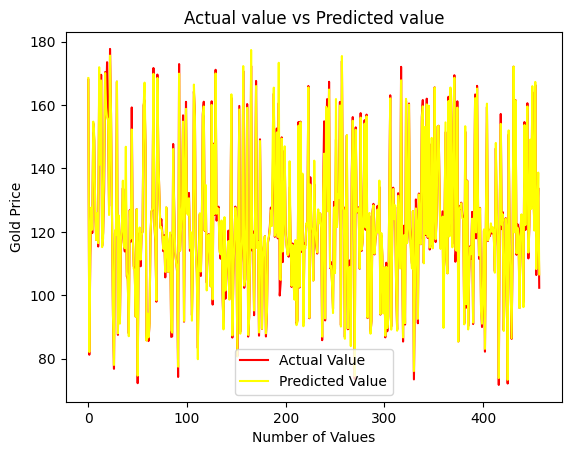

In [25]:

Y_test = list(Y_test)
plt.plot(Y_test,color='red',label = 'Actual Value')
plt.plot(test_data_prediction,color='yellow',label = 'Predicted Value')
plt.title('Actual value vs Predicted value')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

___________________________________________________________